In [233]:
!pip install minisom

In [234]:
import numpy as np
import pandas as pd
#encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Clustering
from minisom import MiniSom

# Data Preparation

In [235]:
df = pd.read_csv(r'C:\Users\efvs\Downloads\marketing_campaign.csv',sep='\t')

In [236]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [237]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Encoding - Categóricos

- Nesta etapa, transformaremos as variáveis categóricas para numéricas, do seguinte modo:
    - Usaremos OrdinalEncoding para as variáveis categóricas, que onde existe grau de importância; 
    - Usaremos apenas o LabelEncoder para as que não.

In [238]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [239]:
def ordinal_encoder(value):
    if value == 'Basic':
        return 0
    elif value == 'Graduation':
        return 1
    elif value == '2n Cycle':
        return 2
    elif value == 'Master':
        return 3
    elif value == 'PhD':
        return 4

df['Education'] = df.Education.apply(ordinal_encoder)

In [240]:
enc = LabelEncoder()
df['Marital_Status']=enc.fit_transform(df['Marital_Status'])

In [241]:
enc2 = LabelEncoder()
df['Dt_Customer']=enc.fit_transform(df['Dt_Customer'])

# Feature Engineering

Ações pare redução da dimensionalidade e melhor compreensão do problema

In [242]:
# Agregando número de filhos
df['num_filhos']=df['Kidhome']+df['Teenhome']
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

In [243]:
df['Year_Birth'] = 2022 - df['Year_Birth']

In [244]:
df.rename({'Year_Birth':'Age'},axis=1,inplace=True)

<AxesSubplot:>

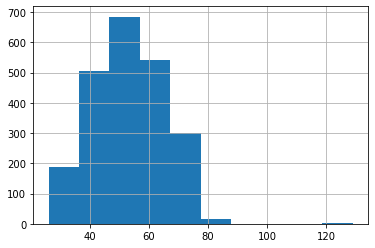

In [245]:
df['Age'].hist()

In [246]:
#Removendo outliers na idade
df = df[df['Age']<100]

In [247]:
#Removendo variáveis sem documentação
df.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)

In [248]:
#Agregando as informações de compra
df['Camp_Aceitas'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + 
                    df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'])
    
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
         'AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)

## Encoding - Numéricos

- Nesta etapa, normalizaremos os dados numéricos, propositalmente após as mudanças em algumas features
- Faremos 2 abordagens, para possibilitar testes de adequação dos modelos e legibilidade

In [343]:
norm_Z = StandardScaler()
df_copiado = df.copy()

df_norm = pd.DataFrame(norm_Z.fit_transform(df_copiado),columns=df_copiado.columns)

In [250]:
df_norm.describe()

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_filhos,Camp_Aceitas
count,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.213000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03
mean,2.054682e-17,5.776932e-17,-1.706279e-16,2.367351e-16,-5.986481e-17,1.463061e-16,9.005363e-17,4.307884e-17,-6.397307e-17,-7.149201e-17,9.826739e-18,-1.558382e-17,-5.449374e-17,5.541189e-17,9.303143e-17,-4.352551e-17,-1.950459e-17,5.970489e-17,1.095830e-16,2.840325e-16
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000226e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-1.723196e+00,-2.316236e+00,-1.602898e+00,-3.467227e+00,-2.006386e+00,-1.723382e+00,-1.696210e+00,-9.034065e-01,-6.616060e-01,-7.398445e-01,-6.868864e-01,-6.556625e-01,-8.448586e-01,-1.204030e+00,-1.470819e+00,-9.109389e-01,-1.782765e+00,-2.192713e+00,-1.264618e+00,-4.388155e-01
25%,-8.512305e-01,-6.922077e-01,-8.198270e-01,-6.785691e-01,-6.749549e-01,-8.660527e-01,-8.671831e-01,-8.320839e-01,-6.364216e-01,-6.689259e-01,-6.319692e-01,-6.314405e-01,-6.719236e-01,-6.865630e-01,-7.510942e-01,-9.109389e-01,-8.597490e-01,-9.560294e-01,-1.264618e+00,-4.388155e-01
50%,-4.183415e-02,-9.388133e-02,-8.198270e-01,2.509833e-01,-3.430598e-02,-8.723046e-03,-3.613327e-03,-3.863176e-01,-4.601307e-01,-4.428728e-01,-4.672176e-01,-4.618862e-01,-3.836987e-01,-1.690962e-01,-3.136932e-02,-2.266641e-01,-2.444047e-01,2.806540e-01,6.540104e-02,-4.388155e-01
75%,8.742077e-01,8.463457e-01,7.463156e-01,1.180536e+00,6.455518e-01,8.275679e-01,8.599565e-01,5.943684e-01,1.694798e-01,2.884754e-01,2.284002e-01,1.436647e-01,2.311812e-01,3.483706e-01,6.883555e-01,4.576107e-01,6.786117e-01,6.928818e-01,6.540104e-02,-4.388155e-01
max,1.726139e+00,2.470374e+00,1.529387e+00,3.039641e+00,2.440836e+01,1.758533e+00,1.723526e+00,3.533455e+00,4.350093e+00,6.906069e+00,4.054298e+00,5.714733e+00,6.110971e+00,6.557972e+00,8.245467e+00,8.668909e+00,2.216972e+00,6.051843e+00,2.725440e+00,5.456862e+00


In [348]:
norm_MinMax = MinMaxScaler()
df_copiado2 = df.copy()

df_norm2 = pd.DataFrame(norm_MinMax.fit_transform(df_copiado2),columns=df_copiado2.columns)

In [252]:
df_norm2.describe()

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_filhos,Camp_Aceitas
count,2237.000000,2237.000000,2237.000000,2237.000000,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,0.499573,0.483899,0.511734,0.532857,0.075957,0.494952,0.496006,0.203614,0.132012,0.096763,0.144877,0.102923,0.121461,0.155118,0.151377,0.095089,0.445721,0.265959,0.316942,0.074430
std,0.289976,0.208963,0.319327,0.153718,0.037866,0.287262,0.292486,0.225435,0.199578,0.130818,0.210965,0.157011,0.143796,0.128862,0.102943,0.104409,0.250072,0.121319,0.250679,0.169654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252792,0.339286,0.250000,0.428571,0.050405,0.246224,0.242424,0.016075,0.005025,0.009275,0.011583,0.003802,0.024862,0.066667,0.074074,0.000000,0.230769,0.150000,0.000000,0.000000
50%,0.487445,0.464286,0.250000,0.571429,0.074658,0.492447,0.494949,0.116544,0.040201,0.038841,0.046332,0.030418,0.066298,0.133333,0.148148,0.071429,0.384615,0.300000,0.333333,0.000000
75%,0.753016,0.660714,0.750000,0.714286,0.100396,0.732628,0.747475,0.337575,0.165829,0.134493,0.193050,0.125475,0.154696,0.200000,0.222222,0.142857,0.615385,0.350000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelando com o SOM

In [349]:
import math
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(df_norm2.iloc[0,:]))))

In [350]:
som = MiniSom(3, 3, len(df_norm2.iloc[0,:]), sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
som.train(np.array(df_norm2.iloc[:,:]), 5000, verbose=True) # trains the SOM with 100 iterations

 [ 2000 / 5000 ]  40% - 0:00:00 left 

 [ 3838 / 5000 ]  77% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 


 quantization error: nan


In [345]:
df_norm2=np.array(df_norm2)

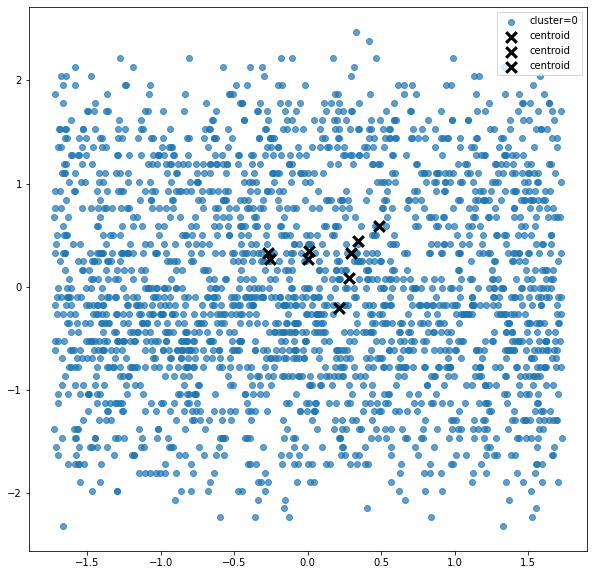

In [351]:
som_shape = (3,3)

winner_coordinates = np.array([som.winner(x) for x in df_norm]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
#We can plot each cluster with a different color:

import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data

plt.figure(figsize=(10,10))
for c in np.unique(cluster_index):
    plt.scatter(df_norm[cluster_index == c, 0],
                df_norm[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
    

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=5, linewidths=15, color='k', label='centroid')
plt.legend()